# Areal Project

<div>
<img src="logo.jpg" width=150 ALIGN="left" border="20">
<h1> Starting Kit for preprocessed data</h1>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

Our code uses multiple libraries, so the next cell will install python's required dependencies (probably only possible on your personal computers). In case you don't want to, or are running in the competition's docker, you can comment it.

In [ ]:
#!pip install --user -r requirements.txt

In [1]:
import numpy as np
import random
import re

In [2]:
model_dir = "sample_code_submission/"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [3]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

<div>
<img src="CNN.png" width=800 align="center" border="20">
We used a special Convolutional Neural Network (CNN) already trained to recognize images in order to create the new data. To create it, we kept the form of the data at three-fourth in the CNN. <br>
This new form is highly similar to weights we can see in a classic neural network.
</div>

In [4]:
data_dir = 'sample_data'
data_name = 'Areal'

In [5]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading sample_data/Areal_train from AutoML format
Number of examples = 300
Number of features = 1024
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [6]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024,target
0,0.106071,0.001777,0.004327,0.011661,0.015068,0.010906,0.019826,0.047200,0.009014,0.011369,...,0.035866,0.007674,0.011295,0.006992,0.035666,0.013637,0.054297,0.076698,0.084652,snowberg
1,0.069425,0.000921,0.018868,0.030748,0.019744,0.003433,0.031509,0.064145,0.043115,0.034331,...,0.025870,0.006954,0.072719,0.008778,0.031796,0.052533,0.026997,0.064874,0.023625,island
2,0.092052,0.000067,0.012185,0.021340,0.009253,0.010788,0.027914,0.043856,0.009098,0.015725,...,0.019264,0.007737,0.017554,0.004777,0.074484,0.019736,0.034742,0.062472,0.017112,forest
3,0.123751,0.002270,0.001138,0.042464,0.053743,0.016156,0.060952,0.077559,0.025709,0.034909,...,0.010575,0.006195,0.045711,0.003325,0.021387,0.053118,0.031510,0.088904,0.071321,island
4,0.095870,0.001628,0.006228,0.023276,0.009811,0.010350,0.119979,0.102470,0.018967,0.020871,...,0.004668,0.004444,0.009534,0.005907,0.168387,0.033255,0.003384,0.030591,0.015277,chaparral


In [7]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.120775,0.003035,0.012286,0.029816,0.022796,0.011357,0.028089,0.056484,0.021844,0.025063,...,0.013223,0.016655,0.011403,0.027674,0.007604,0.059426,0.034883,0.033270,0.040154,0.045940
std,0.034516,0.004182,0.010794,0.027559,0.016298,0.008459,0.022144,0.017805,0.015389,0.014413,...,0.017772,0.011443,0.008887,0.022417,0.004275,0.035726,0.017830,0.030985,0.033919,0.038091
min,0.051355,0.000000,0.000046,0.003137,0.000479,0.000000,0.000191,0.015153,0.000141,0.001333,...,0.000000,0.001139,0.000000,0.002762,0.000000,0.005204,0.004798,0.000486,0.000687,0.000198
25%,0.096800,0.000489,0.004248,0.011659,0.010101,0.004823,0.012591,0.043761,0.009223,0.015776,...,0.001831,0.008007,0.005445,0.012790,0.004795,0.035714,0.021029,0.009940,0.015250,0.017125
50%,0.115234,0.001629,0.009212,0.020470,0.018810,0.009804,0.022277,0.055789,0.019688,0.023365,...,0.007524,0.013686,0.009319,0.021877,0.007435,0.051159,0.030635,0.024190,0.030191,0.039073
75%,0.139764,0.003824,0.018444,0.038136,0.031027,0.016193,0.036847,0.065938,0.030548,0.032112,...,0.017248,0.022501,0.014143,0.035120,0.009951,0.079322,0.046225,0.047323,0.057659,0.062446
max,0.264518,0.030026,0.072500,0.217381,0.075004,0.043993,0.145499,0.122579,0.107858,0.092739,...,0.115501,0.066924,0.065061,0.147605,0.025086,0.192191,0.109442,0.147518,0.202446,0.253949


In [8]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

        target
0     snowberg
1       island
2       forest
3       island
4    chaparral
5        beach
6       island
7       forest
8      wetland
9        river
10      island
11   chaparral
12       cloud
13        lake
14      meadow
15       beach
16       cloud
17        lake
18       cloud
19        lake
20    snowberg
21      forest
22     wetland
23       river
24    snowberg
25       river
26      desert
27       river
28     wetland
29      island
..         ...
270       lake
271   mountain
272      river
273        sea
274       lake
275   snowberg
276      cloud
277  chaparral
278  chaparral
279        sea
280      river
281   mountain
282    wetland
283       lake
284  chaparral
285        sea
286     forest
287       lake
288      river
289      river
290    wetland
291     island
292        sea
293      beach
294      cloud
295     desert
296   mountain
297     meadow
298     meadow
299     forest

[300 rows x 1 columns]


### Visualization of values

Most values are in the range (0, 5).

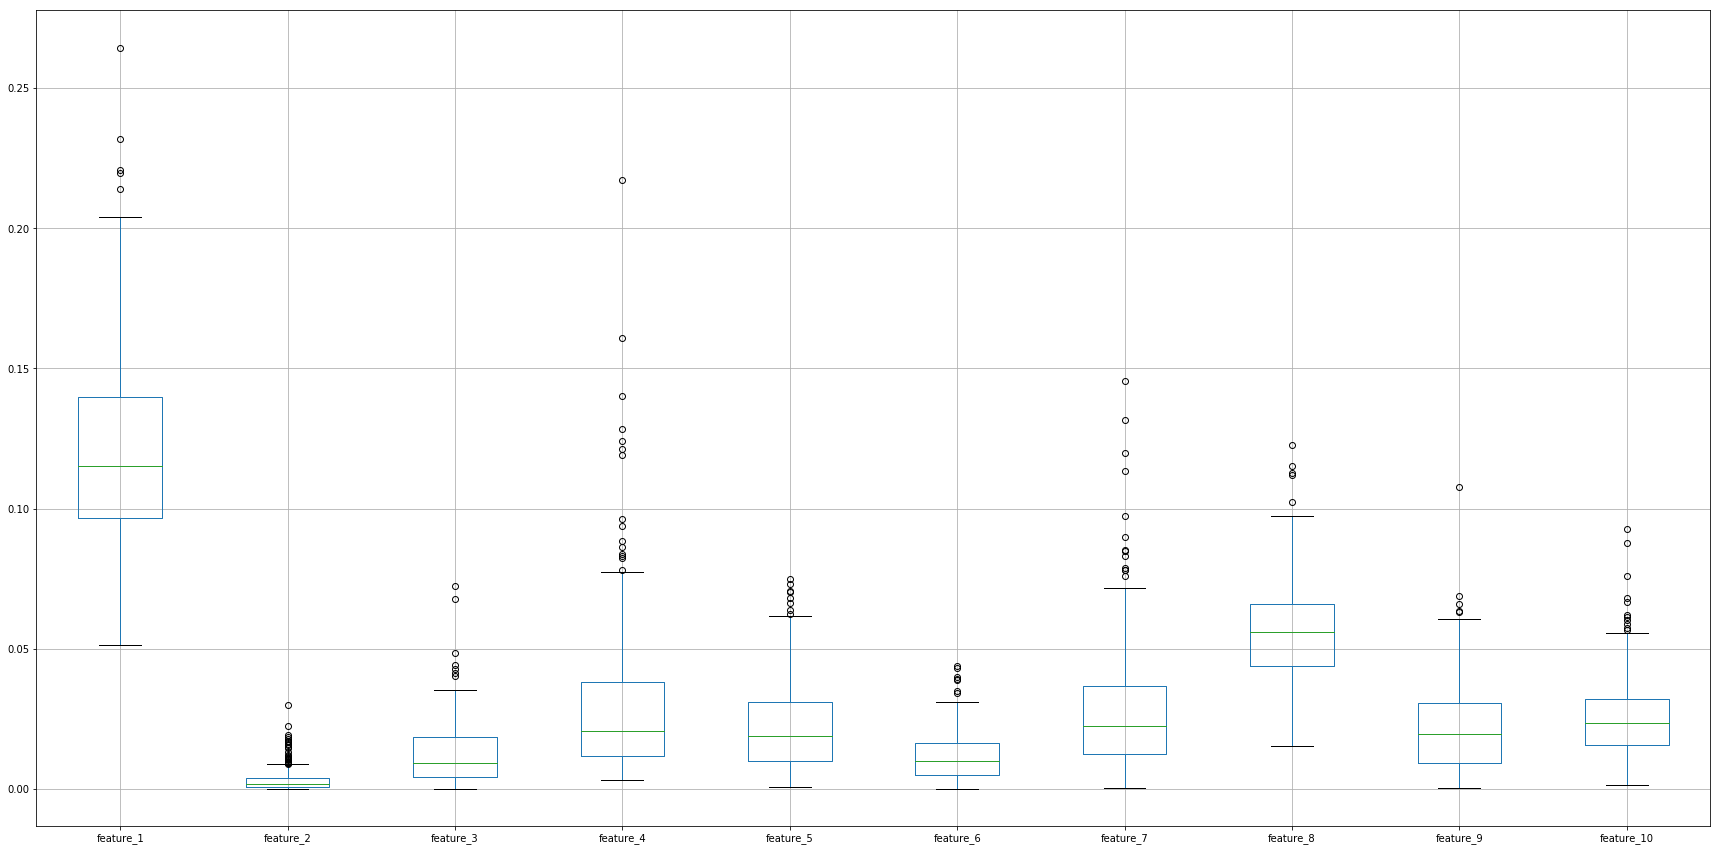

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,15))
# Plot values of first 10 features
data_plot=data.iloc[:,:10]
data_plot.boxplot()
plt.show()

### Visualisation as images

Although any human won't be able to make sense of those images, it is by far simpler and faster for computers to correctly recognize those "images" and assign them their correct classes.

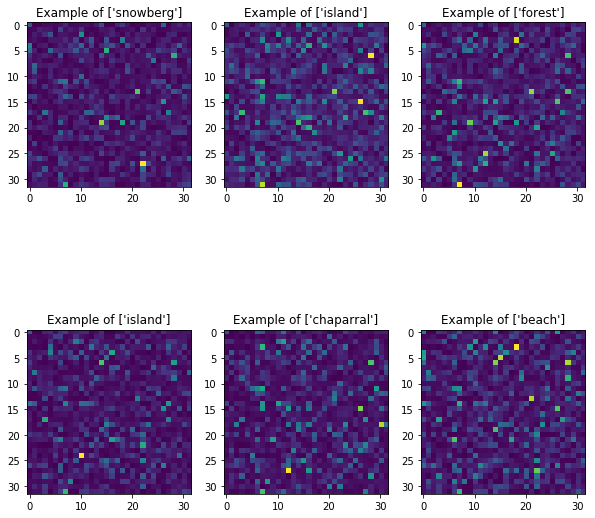

In [10]:
import matplotlib.image as mpimg

num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(32, 32)
    label = data.values[i][-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float))

plt.show()

# Step 2: Building a predictive model

Use DataManager to separate data for train, validation and test

In [11]:
from data_manager import DataManager
D = DataManager(data_name, data_dir)
print(D)

Info file found : /home/tp-home007/khuart/L2_MI/projects/ppSputnik/starting_kit/sample_data/Areal_public.info
DataManager : Areal
info:
	usage = Sample dataset Areal preprocessed data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 1024
	target_num = 13
	label_num = 13
	train_num = 300
	valid_num = 150
	test_num = 150
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(300, 1024)
	Y_train = array(300, 1)
	X_valid = array(150, 1024)
	Y_valid = array(150, 1)
	X_test = array(150, 1024)
	Y_test = array(150, 1)
feat_type:	array(1024,)
feat_idx:	array(0,)



Get data and labels by calling D.data (DataManager.data)

In [12]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

The model is a simpler version of the decision tree algorithm of sklearn.

You can only change the parameter max_depth which has a default value of 5.

In [13]:
from model import SimpleDecisionTree

ImportError: cannot import name 'SimpleDecisionTree' from 'model' (sample_code_submission/model.py)

In [ ]:
M = SimpleDecisionTree()

#### Fit the model

Data as first argument, Labels as second, with .reshape(-1) to make sure that the array containing labels is flat and don't have multiple dimensions.

In [ ]:
M.fit(X_train, Y_train.reshape(-1))

In [ ]:
Y_hat_train = M.predict(D.data['X_train'])
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

In [ ]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
from data_io import mkdir
mkdir(result_dir)

write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

# Scoring predictions

In [ ]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

In [ ]:
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train), "\n")

print("Scores with BaselineModel")
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
if len(D.data['Y_valid'] > 0) and len(D.data['Y_test'] > 0):
    print('Validation score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Keep in mind that the provided model is one that heavily overfits so you shouldn't look too much at the training score.

Using cross-validation (see a bit below) will give more significant results.

## Confusion matrix

Doesn't have much value on train with a 100% accuracy, but it can be good to look at if you change your model.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

# Cross-validation

Because validation and test labels should first not be available, we do cross validation to see our models quality

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scores = cross_val_score(M, X_train, Y_train.ravel(), cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [ ]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

### Test scoring program

In [ ]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

# Prepare the submission

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = './sample_code_submission_prep_' + the_date + '.zip'
sample_result_submission = './sample_result_submission_prep_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)